In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [61]:
df = pd.read_csv('placement.csv')
df.sample(5)

,cgpa,placement_exam_marks,placed
48,6.29,42.0,0
384,7.03,33.0,0
319,7.53,13.0,0
664,7.23,34.0,0
51,6.24,28.0,1


In [76]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

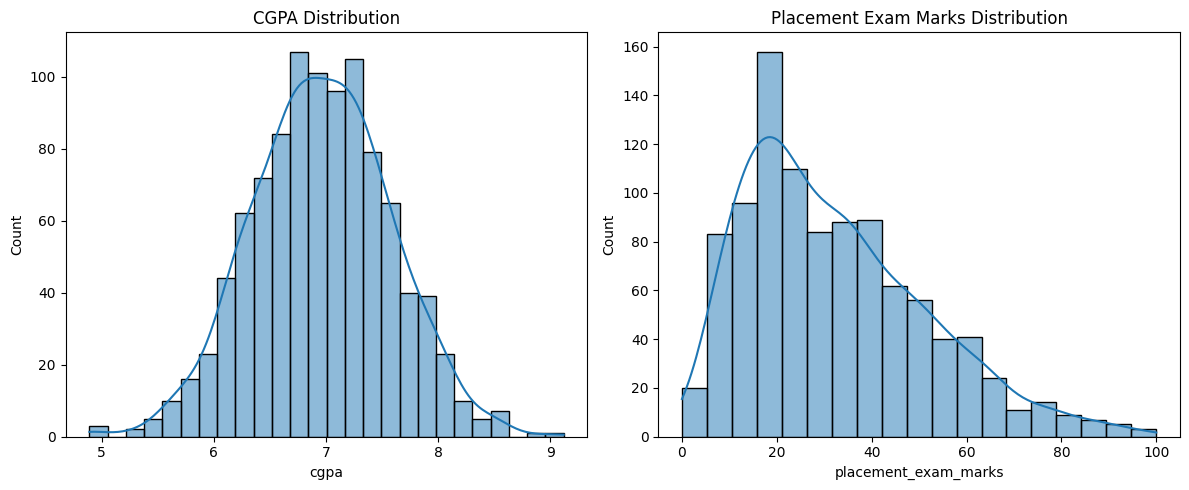

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 5))  # Adjust figure size for better readability

# First subplot: Histogram of CGPA with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['cgpa'], kde=True)
plt.title('CGPA Distribution')

# Second subplot: Histogram of Placement Exam Marks
plt.subplot(1, 2, 2)
sns.histplot(df['placement_exam_marks'], kde=True)  # Added KDE for consistency
plt.title('Placement Exam Marks Distribution')


plt.tight_layout()  # Adjust layout to prevent overlap


plt.show()



In [63]:
print("Mean of cgpa is: ",df['cgpa'].mean())
print("Std of cgpa is: ",df['cgpa'].std())
print("Min of cgpa is: ",df['cgpa'].min())
print("Max of cgpa is: ",df['cgpa'].max())

Mean of cgpa is:  6.96124
Std of cgpa is:  0.6158978751323896
Min of cgpa is:  4.89
Max of cgpa is:  9.12


In [64]:
upperbound = df['cgpa'].mean() + 3*df['cgpa'].std()
upperbound = float(upperbound)

lowerbound = df['cgpa'].mean() - 3*df['cgpa'].std()
lowerbound = float(lowerbound)
upperbound,lowerbound

(8.808933625397168, 5.113546374602832)

In [65]:
df[(df['cgpa'] > upperbound) | (df['cgpa'] < lowerbound)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

In [66]:
new_df = df[(df['cgpa'] <upperbound) & (df['cgpa'] > lowerbound)]
new_df


,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


# Calculation z-score

In [67]:
df['z_score'] = (df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

df.head()

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [68]:
df[df['z_score'] > 3]


,cgpa,placement_exam_marks,placed,z_score
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [69]:
df[df['z_score'] < -3]

,cgpa,placement_exam_marks,placed,z_score
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


# Capping

In [70]:
upperbound,lowerbound

(8.808933625397168, 5.113546374602832)

In [ ]:
df['cgpa'] = np.where(
    df['cgpa']>upperbound,
        upperbound,
        np.where(
            df['cgpa']<lowerbound,
            lowerbound,
            df['cgpa']
        )
)



In [74]:
df.shape

(1000, 4)

In [75]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64